# Regresión logística para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/bank/bank.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.shape

(4119, 21)

In [4]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [5]:
data['y'] = (data['y']=='yes').astype(int)
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [6]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [7]:
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])

data['education'] = np.where(data['education'] == 'high.school', 'High School', data['education'])
data['education'] = np.where(data['education'] == 'professional.course', 'Professional Course', data['education'])
data['education'] = np.where(data['education'] == 'university.degree', 'University Degree', data['education'])

data['education'] = np.where(data['education'] == 'illiterate', 'Illiterate', data['education'])
data['education'] = np.where(data['education'] == 'unknown', 'Unknown', data['education'])

In [8]:
data['education'].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [9]:
data['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [10]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [11]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

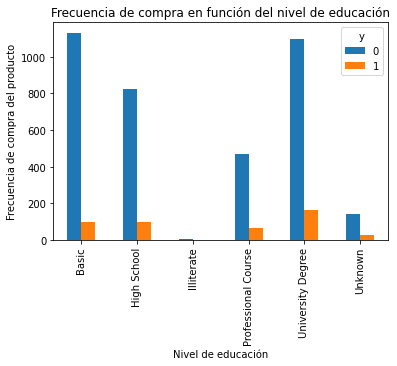

In [12]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind='bar')
plt.title('Frecuencia de compra en función del nivel de educación')
plt.xlabel('Nivel de educación')
plt.ylabel('Frecuencia de compra del producto')

Text(0, 0.5, 'Proporción de clientes')

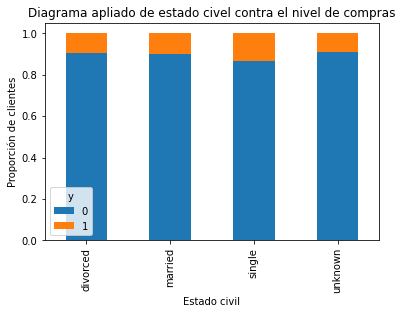

In [13]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Diagrama apliado de estado civel contra el nivel de compras')
plt.xlabel('Estado civil')
plt.ylabel('Proporción de clientes')

Text(0, 0.5, 'Proporción de clientes')

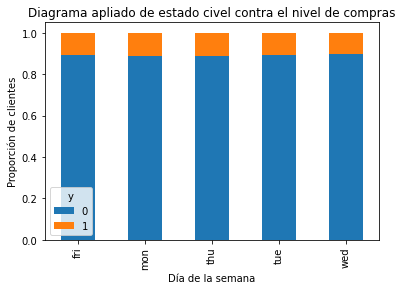

In [14]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Diagrama apliado de estado civel contra el nivel de compras')
plt.xlabel('Día de la semana')
plt.ylabel('Proporción de clientes')

Text(0, 0.5, 'Proporción de clientes')

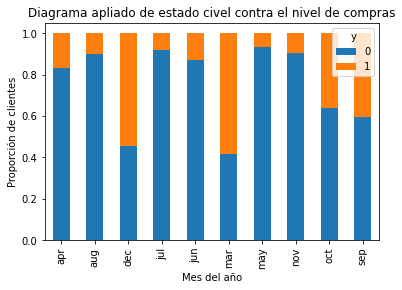

In [15]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Diagrama apliado de estado civel contra el nivel de compras')
plt.xlabel('Mes del año')
plt.ylabel('Proporción de clientes')

Text(0, 0.5, 'Frecuencia de compra del producto')

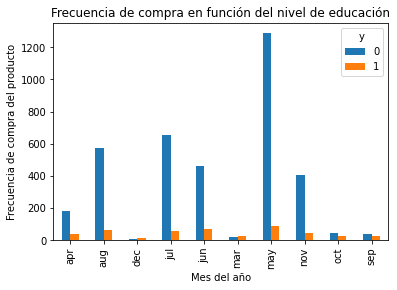

In [16]:
%matplotlib inline
pd.crosstab(data.month, data.y).plot(kind='bar')
plt.title('Frecuencia de compra en función del nivel de educación')
plt.xlabel('Mes del año')
plt.ylabel('Frecuencia de compra del producto')

Text(0, 0.5, 'Clientes')

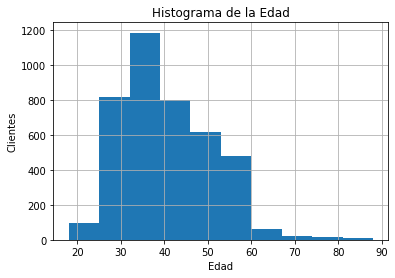

In [17]:
data.age.hist()
plt.title('Histograma de la Edad')
plt.xlabel('Edad')
plt.ylabel('Clientes')

<AxesSubplot:xlabel='poutcome'>

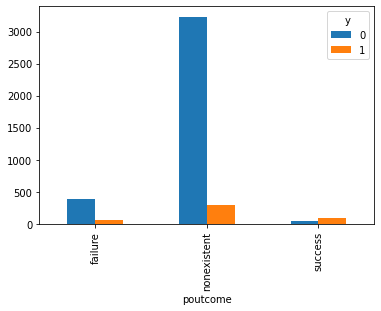

In [18]:
pd.crosstab(data.poutcome, data.y).plot(kind='bar')

## Conversión de las variables categóricas a dummies

In [19]:
categories = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [20]:
data_vars = data.columns.values.tolist()

In [21]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ['default']]

In [22]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [23]:
bank_data_vars = bank_data.columns.values.tolist()

Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

## Selección de rasgos para el modelo

In [24]:
n = 12

In [25]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression(solver='lbfgs', max_iter=1500)

In [27]:
rfe = RFE(estimator=lr, n_features_to_select=n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [28]:
print(rfe.support_)

[False False False False  True False False False  True False False False
  True False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False  True False False  True  True  True
 False False False False False False False  True False  True]


In [29]:
print(rfe.ranking_)

[40 45 22 47  1 19 28 26  1 44 25  4  1 42  1 43  1  6 39 36 18  8 20 38
 35 46 30 16  7 24 37  9 11 23 27 15 17 34 10  3  1  5  1 41  2  1  1  1
 13 21 32 29 33 31 12  1 14  1]


In [30]:
z = zip(bank_data_vars, rfe.support_, rfe.ranking_)
list(z)

[('age', False, 40),
 ('duration', False, 45),
 ('campaign', False, 22),
 ('pdays', False, 47),
 ('previous', True, 1),
 ('emp.var.rate', False, 19),
 ('cons.price.idx', False, 28),
 ('cons.conf.idx', False, 26),
 ('euribor3m', True, 1),
 ('nr.employed', False, 44),
 ('y', False, 25),
 ('job_admin.', False, 4),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 42),
 ('job_housemaid', True, 1),
 ('job_management', False, 43),
 ('job_retired', True, 1),
 ('job_self-employed', False, 6),
 ('job_services', False, 39),
 ('job_student', False, 36),
 ('job_technician', False, 18),
 ('job_unemployed', False, 8),
 ('job_unknown', False, 20),
 ('marital_divorced', False, 38),
 ('marital_married', False, 35),
 ('marital_single', False, 46),
 ('marital_unknown', False, 30),
 ('education_Basic', False, 16),
 ('education_High School', False, 7),
 ('education_Illiterate', False, 24),
 ('education_Professional Course', False, 37),
 ('education_University Degree', False, 9),
 ('education_Unkn

In [31]:
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"]

In [32]:
bank_data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue

In [33]:
X = bank_data[cols]
Y = bank_data['y']

## Implementación del modelo en Python con statsmodel.api

Con esta libreria es recomendable explorar los valores. Esto usando la función summary y validando los p valores y el intervalo de confianza de cada variable

In [34]:
import statsmodels.api as sm

In [35]:
logit_model = sm.Logit(Y, X)

In [36]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [37]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2023-02-02 11:55  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

## Implementación del modelo en Python con scikit-learn

In [38]:
from sklearn import linear_model

In [39]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression()

In [40]:
logit_model.score(X,Y)

0.8958485069191552

In [41]:
1- Y.mean() #un 10,9% de la gente compra

0.8905074047098811

In [42]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5362541179381402]
1,euribor3m,[-0.5443670397995626]
2,job_blue-collar,[-0.3533138743512503]
3,job_retired,[0.36165159081170567]
4,month_aug,[0.6292588895067585]
5,month_dec,[1.1943974572118885]
6,month_jul,[0.9630554140660935]
7,month_jun,[1.0566897056469091]
8,month_mar,[1.6386680234586541]
9,month_nov,[0.4577084191058976]


## Validación del modelo logístico

In [43]:
from sklearn.model_selection import train_test_split
from IPython.display import display, Math, Latex

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [45]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [46]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}')) # por defecto es así

<IPython.core.display.Math object>

In [47]:
probs = lm.predict_proba(X_test) # Probabilidad estándar
probs

array([[0.95409621, 0.04590379],
       [0.83896646, 0.16103354],
       [0.93216535, 0.06783465],
       ...,
       [0.65098445, 0.34901555],
       [0.97381005, 0.02618995],
       [0.57635748, 0.42364252]])

In [48]:
prediction = lm.predict(X_test) # clasificación estandas. O sea < 0.5 -> 0
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [50]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.045904,0
1,0.161034,1
2,0.067835,0
3,0.062222,0
4,0.042308,0


In [51]:
pd.crosstab(prob_df.prediction, columns='count')

col_0,count
prediction,
0,846
1,390


In [52]:
390/len(prob_df)*100

31.55339805825243

In [53]:
threshold = 0.15
prob_df['prediction'] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns='count')

col_0,count
prediction,
0,915
1,321


In [54]:
321/len(prob_df)*100

25.970873786407765

In [55]:
threshold = 0.05
prob_df['prediction'] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns='count')

col_0,count
prediction,
0,504
1,732


In [56]:
732/len(prob_df)*100

59.22330097087378

In [57]:
from sklearn import metrics

In [58]:
metrics.accuracy_score(Y_test, prediction)

0.901294498381877

In [59]:
metrics.accuracy_score(Y_test, prob_df['prediction'])

0.47572815533980584

## Validación cruzada

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring='accuracy', cv=8)

In [62]:
scores

array([0.90097087, 0.89708738, 0.89902913, 0.90291262, 0.88932039,
       0.88737864, 0.89902913, 0.88521401])

In [63]:
scores.mean()

0.8951177703902383

### Leave One Out Validation

Este método toma como "cv" el total de los datos. Es decir, deja un solo dato como conjunto de test y el total - 1 como conjunto de entrenamiento

In [64]:
from sklearn.model_selection import LeaveOneOut

In [65]:
loo = LeaveOneOut()

scores = cross_val_score(linear_model.LogisticRegression(),X,Y, scoring='accuracy', cv=loo, n_jobs=-1)

In [66]:
scores.mean()

0.894634620053411

## Matrices de Confusión y Curvas ROC

In [67]:
probs = lm.predict_proba(X_test)

In [68]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0] >= threshold, 1, 0)
prob_df['actual'] = list(Y_test) #porque tenía identificadores antiguos, entonces lo listamos para que los pierda
prob_df.head()

,0,prediction,actual
0,0.045904,0,0
1,0.161034,1,0
2,0.067835,0,0
3,0.062222,0,0
4,0.042308,0,0


In [69]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


In [70]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]

In [71]:
sens = TP /(TP + FN)
sens

0.21025641025641026

In [72]:
espc_1 = 1 - (TN/(TN + FP))
espc_1

0.047281323877068515

In [73]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df['prediction'] = np.where(prob_df[0] >= t, 1, 0)
    prob_df['actual'] = list(Y_test) #porque tenía identificadores antiguos, entonces lo listamos para que los pierda
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    sens = TP /(TP + FN)
    sensitivities.append(sens)
    
    espc_1 = 1 - (TN/(TN + FP))
    especifities_1.append(espc_1)
    
sensitivities.append(0)
especifities_1.append(0)

In [74]:
sensitivities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6229508196721312,
 0.5163934426229508,
 0.45081967213114754,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.12295081967213115,
 0]

In [75]:
especifities_1

[1,
 0.7800718132854578,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.21992818671454217,
 0.12387791741472176,
 0.08617594254937166,
 0.07181328545780974,
 0.06463195691202872,
 0.022441651705565557,
 0.013464991023339312,
 0]

In [76]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

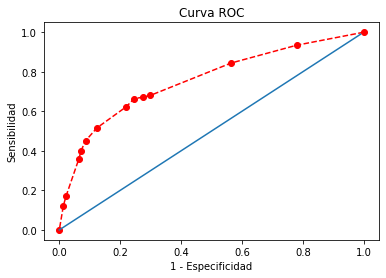

In [77]:
%matplotlib inline

plt.plot(especifities_1, sensitivities, marker='o', linestyle='--', color='r')
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]

plt.plot(x,y)

plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')

In [78]:
from sklearn import metrics
from ggplot import *

In [79]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [80]:
df = pd.DataFrame({
    'x': espc_1,
    'y': sensit
})

In [81]:
df.head()

,x,y
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.024590
3,0.000000,0.032787
4,0.002693,0.032787


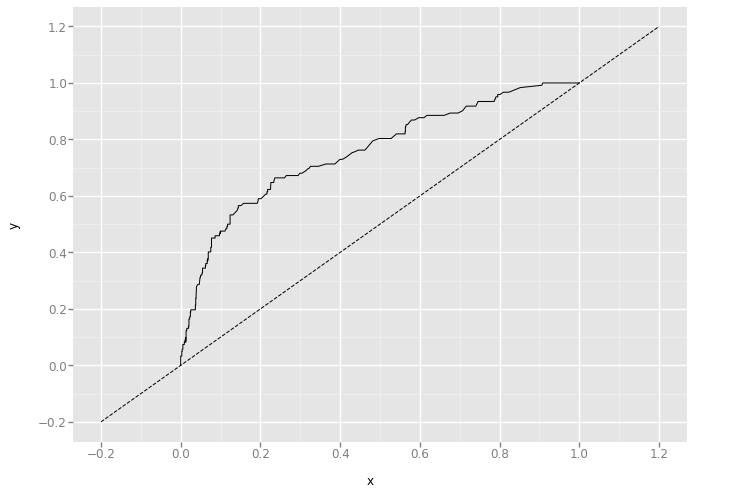

<ggplot: (145051392660)>

In [82]:
ggplot(df, aes(x='x', y='y')) + geom_line() + geom_abline(linetype='dashed')

In [83]:
auc = metrics.auc(espc_1, sensit)
auc #area under curve

0.7579171204049798

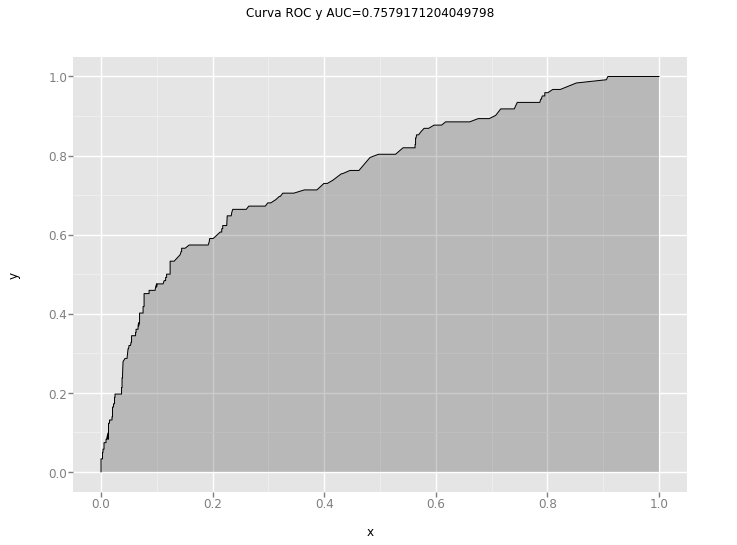

<ggplot: (145016325717)>

In [84]:
ggplot(df, aes(x='x', y='y')) + geom_area(alpha=0.25) + geom_line(aes(y='y')) + ggtitle('Curva ROC y AUC=%s' % str(auc))

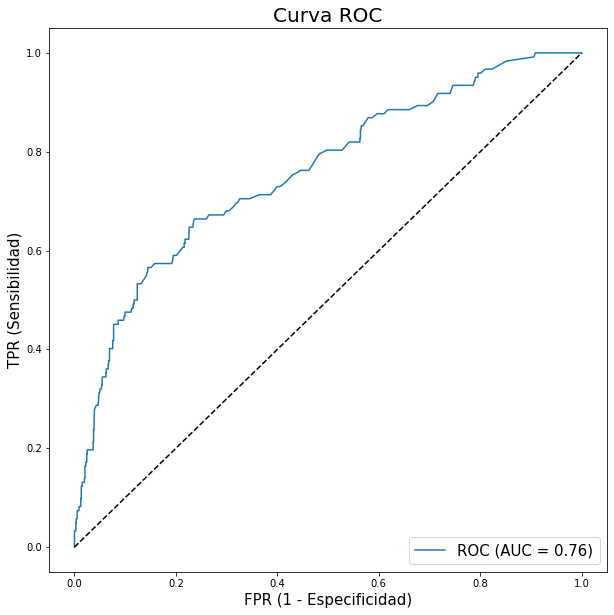

In [86]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calcular el AUC
auc = roc_auc_score(Y_test, prob)

# Calcular las curvas ROC
fpr, tpr, thresholds = roc_curve(Y_test, prob)

# Crear una figura de tamaño ajustado
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar la curva ROC
ax.plot(fpr, tpr, label='ROC (AUC = %0.2f)' % auc)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('FPR (1 - Especificidad)', fontsize=15)
ax.set_ylabel('TPR (Sensibilidad)', fontsize=15)
ax.set_title('Curva ROC', fontsize=20)
ax.legend(loc="lower right", fontsize=15)
plt.show()

In [87]:
thresholds

array([1.93794301, 0.93794301, 0.86726777, 0.83221942, 0.70888223,
       0.64231716, 0.63743829, 0.60917789, 0.6045888 , 0.57202006,
       0.53333085, 0.52842256, 0.52821895, 0.51959107, 0.5168273 ,
       0.51482644, 0.50157105, 0.47362783, 0.45943364, 0.44998283,
       0.44310328, 0.42895271, 0.42244093, 0.4100881 , 0.4033157 ,
       0.39509753, 0.39188604, 0.39166737, 0.39047417, 0.3718295 ,
       0.37158668, 0.37156946, 0.36840301, 0.36704805, 0.36602084,
       0.36601392, 0.35941045, 0.35541437, 0.35485648, 0.35128418,
       0.35103048, 0.35052333, 0.35040825, 0.35026988, 0.34901555,
       0.34862453, 0.34456825, 0.34312781, 0.33668446, 0.3196422 ,
       0.31867438, 0.31843267, 0.31578033, 0.31571629, 0.31566005,
       0.31397876, 0.31313993, 0.29480722, 0.28338258, 0.27342907,
       0.27325187, 0.26348038, 0.25127533, 0.23579331, 0.23534421,
       0.23353949, 0.21560537, 0.2144123 , 0.200219  , 0.19990427,
       0.1989738 , 0.19892656, 0.19879639, 0.19772361, 0.19763